In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Dương Bảo Châu'
!ls

/content/drive/.shortcut-targets-by-id/1xBP49vgC0ID9xnGysLw1YvZa0h6-OSVX/Dương Bảo Châu
Analysis_use_Pandas.ipynb  Homework8-matplotlib.ipynb  housing.data
googleplaystore.csv	   Homework9-Pandas.ipynb      housing.names


In [ ]:
import csv
import pandas as pd
import numpy as np
import re

In [ ]:
f = open('googleplaystore.csv', newline='')
with f:
  reader = csv.reader(f)
  google = list(reader)
google[10473].insert(1, 'TOOLS')  # missing 10473
data = pd.DataFrame(data=google[1:], columns=google[0])
data['Reviews'] = data['Reviews'].astype(int)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**1.** In ra 5 hàng đầu tiên trong dataset.

In [ ]:
data.head(n=5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**2.** Tính số hàng (số app), số cột (số feature mỗi app) trong dataset.

In [ ]:
nRow, nCol = data.shape
print(f'There are {nRow} apps and {nCol} features in each app.')

There are 10841 apps and 13 features in each app.


**3.** Có nhiều app bị trùng trong dataset (ví dụ instagram) do thông tin của app được lưu nhiều lần. Tạo 1 dict key là tên app, value là số lượng reviews nhiều nhất trong các lần lưu của app đấy (group_by).

In [ ]:
data_groupby = data.groupby('App')['Reviews'].max()
data_groupby

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: int64

In [ ]:
data.groupby('App').Reviews.max().to_dict()

{'"i DT" Fútbol. Todos Somos Técnicos.': 27,
 '+Download 4 Instagram Twitter': 40467,
 '- Free Comics - Comic Apps': 115,
 '.R': 259,
 '/u/app': 573,
 '058.ba': 27,
 '1. FC Köln App': 2019,
 '10 Best Foods for You': 2490,
 '10 Minutes a Day Times Tables': 681,
 '10 WPM Amateur ham radio CW Morse code trainer': 10,
 '10,000 Quotes DB (Premium)': 70,
 '100 Doors of Revenge': 105766,
 '100+ C Programs': 20,
 '100000+ Messages - DP, Status, Jokes & GIF 2018': 121,
 '101 C Programming Problems': 498,
 '104 Looking for a job - looking for a job, looking for a job, looking for a part-time job, health checkup, resume, treatment room': 74359,
 '11st': 48732,
 '12 Step Meditations & Sober Prayers AA NA AL-ANON': 759,
 '14thStreetVet': 0,
 '17th Edition Cable Sizer': 47,
 '1800 Contacts - Lens Store': 23160,
 '1LINE – One Line with One Touch': 214878,
 '1st Fed CI Mobile Banking': 0,
 '2 Amateur ham radio CW Morse code practice keys TX': 6,
 '2-Player Co-op Zombie Shoot': 33,
 '20 Minuten (CH)': 

In [ ]:
df_app_reviews = data_groupby.set_index('App')['Reviews'].to_dict()

In [ ]:
df_app_reviews['Facebook']

78158306

**4**. Các app bị lưu nhiều lần mình chỉ giữ lại 1 app có số lượng reviews nhiều nhất, boolean mask

In [ ]:
#1st try: data_sorted = data.sort_values('Reviews', ascending=False).groupby(['App']).first().reset_index()
data_sorted = data.groupby(['App']).apply(lambda x: x.nlargest(1, 'Reviews')).reset_index(drop=True)

**5.** Mình quan tâm đến các app tiếng anh, nên sẽ lọc các app có tên bằng tiếng anh.
- Viết hàm kiểm tra tên app: checkEnglishName(name).
- Hàm trả về True nếu tên app có tối đa 3 kí tự ascii không nằm trong khoảng (0-127).
- Chấp nhận 3 kí tự nằm ngoài khoảng 0-127 vì có những app có tên gồm kí tự emoji như: "Instachat 😜" 
- Sau đó lọc các app có tên thỏa mãn hàm checkEnglishName, (map, apply)

In [ ]:
def checkEnglishName(name):
  count = sum([1 for i in name if (ord(i) < 0 or (ord(i) > 127))])
  return count < 4

In [ ]:
# apply tao new_col data_demo['new_col']= data_demo[data_demo['App'].apply(checkEnglishName)]
data_sorted = data_sorted[data_sorted['App'].apply(checkEnglishName)]
data_sorted

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9652,"漫咖 Comics - Manga,Novel and Stories",COMICS,4.1,12088,21M,"1,000,000+",Free,0,Mature 17+,Comics,"July 6, 2018",2.3.1,4.0.3 and up
9656,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
9657,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
9658,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


**6.** Mình quan tâm đến các app free, lọc các app có Type='Free', data[data.Type=='Free']

In [ ]:
data_free = data_sorted[data_sorted.Type=='Free']
data_free

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,乗換NAVITIME Timetable & Route Search in Japan T...,MAPS_AND_NAVIGATION,4.4,50459,Varies with device,"5,000,000+",Free,0,Everyone,Maps & Navigation,"July 26, 2018",Varies with device,Varies with device
9652,"漫咖 Comics - Manga,Novel and Stories",COMICS,4.1,12088,21M,"1,000,000+",Free,0,Mature 17+,Comics,"July 6, 2018",2.3.1,4.0.3 and up
9657,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
9658,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


**7.** Mình muốn xem trong các app free, tổng số lượng app của mỗi category Series(value_counts, unique) là bao nhiêu. Sau đó tính tần suất xuất hiện của mỗi category. Rồi trả lời các câu hỏi:
- Category nào phổ biến nhất? Category nào có ít app nhất.
- Xu hướng app làm về các category như thế nào.

In [ ]:
data_free.Category.value_counts()

FAMILY                 1675
GAME                    862
TOOLS                   751
BUSINESS                407
LIFESTYLE               346
PRODUCTIVITY            345
FINANCE                 328
MEDICAL                 313
SPORTS                  301
PERSONALIZATION         294
COMMUNICATION           287
HEALTH_AND_FITNESS      273
PHOTOGRAPHY             261
NEWS_AND_MAGAZINES      248
SOCIAL                  236
TRAVEL_AND_LOCAL        207
SHOPPING                199
BOOKS_AND_REFERENCE     190
DATING                  165
VIDEO_PLAYERS           159
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          110
EDUCATION               103
ENTERTAINMENT            85
LIBRARIES_AND_DEMO       83
AUTO_AND_VEHICLES        82
HOUSE_AND_HOME           73
WEATHER                  71
EVENTS                   63
PARENTING                58
ART_AND_DESIGN           57
COMICS                   55
BEAUTY                   53
Name: Category, dtype: int64

In [ ]:
print(data_free.Category.unique(), 'Total number of free apps:' ,np.sum(data_free.Category.value_counts()))

['SPORTS' 'SOCIAL' 'COMICS' 'TOOLS' 'COMMUNICATION' 'NEWS_AND_MAGAZINES'
 'HEALTH_AND_FITNESS' 'FAMILY' 'LIFESTYLE' 'BUSINESS' 'SHOPPING' 'MEDICAL'
 'GAME' 'FINANCE' 'PERSONALIZATION' 'PHOTOGRAPHY' 'TRAVEL_AND_LOCAL'
 'DATING' 'PRODUCTIVITY' 'ART_AND_DESIGN' 'FOOD_AND_DRINK' 'VIDEO_PLAYERS'
 'BOOKS_AND_REFERENCE' 'HOUSE_AND_HOME' 'MAPS_AND_NAVIGATION' 'EVENTS'
 'EDUCATION' 'AUTO_AND_VEHICLES' 'WEATHER' 'BEAUTY' 'ENTERTAINMENT'
 'LIBRARIES_AND_DEMO' 'PARENTING'] Total number of free apps: 8864


In [ ]:
data_category = data_free.groupby(['Category'])['App'].count().reset_index()
data_category.head()

,Category,App
0,ART_AND_DESIGN,57
1,AUTO_AND_VEHICLES,82
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,190
4,BUSINESS,407


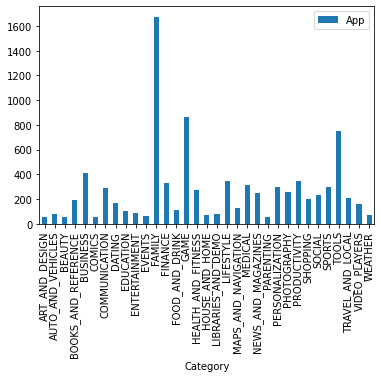

In [ ]:
data_category[['Category', 'App']].plot.bar('Category', 'App')

In [ ]:
data_free.Category.value_counts(normalize=True)*100

FAMILY                 18.896661
GAME                    9.724729
TOOLS                   8.472473
BUSINESS                4.591606
LIFESTYLE               3.903430
PRODUCTIVITY            3.892148
FINANCE                 3.700361
MEDICAL                 3.531137
SPORTS                  3.395758
PERSONALIZATION         3.316787
COMMUNICATION           3.237816
HEALTH_AND_FITNESS      3.079874
PHOTOGRAPHY             2.944495
NEWS_AND_MAGAZINES      2.797834
SOCIAL                  2.662455
TRAVEL_AND_LOCAL        2.335289
SHOPPING                2.245036
BOOKS_AND_REFERENCE     2.143502
DATING                  1.861462
VIDEO_PLAYERS           1.793773
MAPS_AND_NAVIGATION     1.398917
FOOD_AND_DRINK          1.240975
EDUCATION               1.162004
ENTERTAINMENT           0.958935
LIBRARIES_AND_DEMO      0.936372
AUTO_AND_VEHICLES       0.925090
HOUSE_AND_HOME          0.823556
WEATHER                 0.800993
EVENTS                  0.710740
PARENTING               0.654332
ART_AND_DE

- Category nào phổ biến nhất? Family

- Category nào có ít app nhất? Beauty
- Xu hướng app làm về các category như thế nào? Entertainment and Life supports

**8.** Tính độ rating trung bình ở mỗi category (groupby)

In [ ]:
data_free['Rating'] = data_free['Rating'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_free.Rating

0       NaN
1       4.5
2       3.5
3       4.5
4       4.7
       ... 
9649    4.4
9652    4.1
9657    4.6
9658    4.0
9659    4.7
Name: Rating, Length: 8864, dtype: float64

In [ ]:
data_free.groupby('Category')['Rating'].mean().sort_values(ascending = False)

Category
EVENTS                 4.435556
BOOKS_AND_REFERENCE    4.347799
EDUCATION              4.340196
PARENTING              4.339583
ART_AND_DESIGN         4.338182
PERSONALIZATION        4.300000
BEAUTY                 4.278571
SOCIAL                 4.252736
HEALTH_AND_FITNESS     4.236052
GAME                   4.232034
WEATHER                4.229231
SHOPPING               4.227528
SPORTS                 4.212605
AUTO_AND_VEHICLES      4.184722
PRODUCTIVITY           4.181915
LIBRARIES_AND_DEMO     4.178125
COMICS                 4.177358
FAMILY                 4.171361
FOOD_AND_DRINK         4.167391
PHOTOGRAPHY            4.164516
MEDICAL                4.147807
HOUSE_AND_HOME         4.140984
FINANCE                4.128374
COMMUNICATION          4.126923
ENTERTAINMENT          4.118824
NEWS_AND_MAGAZINES     4.104545
BUSINESS               4.103953
LIFESTYLE              4.082079
TRAVEL_AND_LOCAL       4.068156
VIDEO_PLAYERS          4.043448
MAPS_AND_NAVIGATION    4.039286

In [ ]:
data_free.Installs

0             500+
1       1,000,000+
2          10,000+
3          10,000+
4          10,000+
           ...    
9649    5,000,000+
9652    1,000,000+
9657    1,000,000+
9658       10,000+
9659    1,000,000+
Name: Installs, Length: 8864, dtype: object

**9.** Trường số lượng Install đang ở dạng string, do có dấu "," và "+", xử lý đưa về dạng số.
- Tính số lượng Install trung bình ở mỗi category.

In [ ]:
data_free['Installs']=data_free['Installs'].str.rstrip('+')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_free['Installs']=data_free['Installs'].str.split(',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_free['Installs']=data_free['Installs'].str.join('')
data_free['Installs']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0           500
1       1000000
2         10000
3         10000
4         10000
         ...   
9649    5000000
9652    1000000
9657    1000000
9658      10000
9659    1000000
Name: Installs, Length: 8864, dtype: object

In [ ]:
data_free['Installs'] = data_free['Installs'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_free.groupby('Category')['Installs'].mean().sort_values(ascending = False)

Category
COMMUNICATION          3.845612e+07
VIDEO_PLAYERS          2.472787e+07
SOCIAL                 2.325365e+07
PHOTOGRAPHY            1.784011e+07
PRODUCTIVITY           1.678733e+07
GAME                   1.558802e+07
TRAVEL_AND_LOCAL       1.398408e+07
ENTERTAINMENT          1.164071e+07
TOOLS                  1.078701e+07
NEWS_AND_MAGAZINES     9.549178e+06
BOOKS_AND_REFERENCE    8.767812e+06
SHOPPING               7.036877e+06
PERSONALIZATION        5.201483e+06
WEATHER                5.074486e+06
HEALTH_AND_FITNESS     4.188822e+06
MAPS_AND_NAVIGATION    4.056942e+06
FAMILY                 3.697848e+06
SPORTS                 3.638640e+06
ART_AND_DESIGN         1.986335e+06
FOOD_AND_DRINK         1.924898e+06
EDUCATION              1.833495e+06
BUSINESS               1.712290e+06
LIFESTYLE              1.437816e+06
FINANCE                1.387692e+06
HOUSE_AND_HOME         1.331541e+06
DATING                 8.540288e+05
COMICS                 8.176573e+05
AUTO_AND_VEHICLES  

**10.** Category nào sẽ potential nếu mình muốn làm app free và kiếm tiền dựa vào quảng cáo.

In [ ]:
#Criteria: (1)free, (2)high installs, (3)high rating (interested/good app)
Communications, Video players, Social